<a href="https://colab.research.google.com/github/kaitlynrv/BGC_DataScience_Forage/blob/main/second_submission_BCG_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [ ]:
!pip install imblearn

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


%matplotlib inline

sns.set(color_codes=True)

---
## 2. Load data

In [ ]:
df = pd.read_csv('/content/client_data.csv')
print(df.head(3))
df.info()

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44  

In [ ]:
#change all date columns to datetime
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


##What's our churn count?

In [ ]:
df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

1419 customers churn

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [ ]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], errors = 'coerce')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


Note that the price_off_peak_var price changes at different months for each customer.

In [ ]:
#group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

#get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

#calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [ ]:
#merge onto price_df
price_df = pd.merge(diff, price_df, on='id', how='inner')
price_df.head(3)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [ ]:
#merge onto df
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916


#New Features

###Consider average difference in peak periods for price

In [ ]:
# Define the columns we're interested in for aggregation
price_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

# Create a new DataFrame to store the calculated mean differences
mean_price_diff = pd.DataFrame()

# Group by 'id' and calculate the mean for each price column
for column in price_columns:
    mean_price_diff[column + '_mean'] = price_df.groupby('id')[column].mean()

In [ ]:
# Calculate the mean differences between consecutive periods
mean_price_diff['off_peak_peak_var_mean_diff'] = mean_price_diff['price_off_peak_var_mean'] - mean_price_diff['price_peak_var_mean']
mean_price_diff['peak_mid_peak_var_mean_diff'] = mean_price_diff['price_peak_var_mean'] - mean_price_diff['price_mid_peak_var_mean']
mean_price_diff['off_peak_mid_peak_var_mean_diff'] = mean_price_diff['price_off_peak_var_mean'] - mean_price_diff['price_mid_peak_var_mean']
mean_price_diff['off_peak_peak_fix_mean_diff'] = mean_price_diff['price_off_peak_fix_mean'] - mean_price_diff['price_peak_fix_mean']
mean_price_diff['peak_mid_peak_fix_mean_diff'] = mean_price_diff['price_peak_fix_mean'] - mean_price_diff['price_mid_peak_fix_mean']
mean_price_diff['off_peak_mid_peak_fix_mean_diff'] = mean_price_diff['price_off_peak_fix_mean'] - mean_price_diff['price_mid_peak_fix_mean']

In [ ]:
# Merge the calculated features with the main DataFrame 'df' using the 'id' column
df = df.merge(mean_price_diff, on='id')

# Display the first few rows of the updated DataFrame
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var_mean,price_off_peak_fix_mean,price_peak_fix_mean,price_mid_peak_fix_mean,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.066530,40.942265,22.352010,14.901340,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.311375,0.000000,0.000000,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.385450,0.000000,0.000000,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.400265,0.000000,0.000000,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.072865,40.688156,24.412893,16.275263,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


###Time dependent features

In [ ]:
# Define the reference date
reference_date = pd.to_datetime('2016-01-01', format='%Y-%m-%d')

# Calculate Contract Length (in months)
df['contract_length'] = ((df['date_end'] - df['date_activ']).dt.days / 30).astype(int)
# Chosen because it reflects the duration of the customer's commitment to the provider.

# Calculate Time Since Last Modification (in months)
df['time_since_last_modification'] = ((reference_date - df['date_modif_prod']).dt.days / 30).astype(int)
# Chosen because it indicates how frequently the customer modifies their product or service.

# Calculate Subscription Age (in months)
df['subscription_age'] = ((reference_date - df['date_activ']).dt.days / 30).astype(int)
# Chosen because it provides insights into the customer's loyalty and tenure with the provider.

# Calculate Time Until Renewal (in months)
df['time_until_renewal'] = ((df['date_renewal'] - df['date_activ']).dt.days / 30).astype(int)
# Chosen because it reflects the time remaining until the next contract renewal.

# Calculate Time Since Renewal (in months)
# Consider the most recent renewal dates
df['time_since_renewal'] = ((reference_date - df['date_renewal']).dt.days / 30).astype(int)
# Chosen because it reflects the recency of the customer's contract renewal.

# Print the first few rows to verify the new features
print(df[['contract_length', 'time_since_last_modification', 'time_until_renewal', 'subscription_age', 'time_since_renewal']].head())
df

   contract_length  time_since_last_modification  time_until_renewal  \
0               36                             2                  24   
1               85                            77                  73   
2               73                            69                  60   
3               73                            70                  60   
4               74                            72                  62   

   subscription_age  time_since_renewal  
0                31                   6  
1                77                   4  
2                69                   8  
3                70                   9  
4                72                   9  


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,contract_length,time_since_last_modification,subscription_age,time_until_renewal,time_since_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.034219,0.058257,18.590255,7.450670,26.040925,36,2,31,24,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007124,0.149609,44.311375,0.000000,44.311375,85,77,77,73,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,0.170512,44.385450,0.000000,44.385450,73,69,69,60,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.151210,44.400265,0.000000,44.400265,73,70,70,60,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.030773,0.051309,16.275263,8.137629,24.412893,74,72,72,62,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.144124,44.370635,0.000000,44.370635,48,7,43,24,19
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.024589,0.035982,22.622294,28.047961,50.670256,48,40,40,36,4
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.030633,0.051178,16.280694,8.140345,24.421038,48,47,47,36,10
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.007124,0.149609,44.311375,0.000000,44.311375,48,40,40,36,4


###Get Dummies for Categoricals

In [ ]:
#Get dummies
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])

###Choose Boolean Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 57 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   id                                              14606 non-null  object        
 1   cons_12m                                        14606 non-null  int64         
 2   cons_gas_12m                                    14606 non-null  int64         
 3   cons_last_month                                 14606 non-null  int64         
 4   date_activ                                      14606 non-null  datetime64[ns]
 5   date_end                                        14606 non-null  datetime64[ns]
 6   date_modif_prod                                 14606 non-null  datetime64[ns]
 7   date_renewal                                    14606 non-null  datetime64[ns]
 8   forecast_cons_12m                             

In [ ]:
# Assuming "has_gas" is initially stored as an integer (0 or 1)
df['has_gas'] = df['has_gas'].astype(bool)

##Deal with Skewed columns


In [ ]:
#define numeric features that are skewed
numeric_features = df[[
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]]

numeric_features.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [ ]:
#perform log transformation, adding 1 to ensure values exist
numeric_features = numeric_features.applymap(lambda x: x + 1)
log_transformed_features = np.log(numeric_features)

#replace these in the original DataFrame
df[numeric_features.columns] = log_transformed_features


In [ ]:
log_transformed_features.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,9.725978,1.794277,5.214541,6.820665,4.109217,0.117242,3.493489,0.128407,0.048166,3.767162
std,2.036672,3.953703,4.073975,1.574028,3.649566,0.615683,1.315884,0.021732,0.046734,0.309093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.643958,0.000000,0.000000,6.206566,0.000000,0.000000,2.843746,0.110055,0.000000,3.728261
50%,9.555100,0.000000,6.676453,7.015600,5.752573,0.000000,2.985429,0.133802,0.080785,3.813558
75%,10.615573,0.000000,8.126814,7.784386,7.465512,0.000000,4.883029,0.136581,0.094252,3.813558
max,15.641205,15.239725,13.555708,11.325437,12.074688,3.433987,6.397446,0.242133,0.178962,4.098774


##Dropping Columns

In [ ]:
#will drop date columns as new features have already been made
# Drop date columns
date_columns_to_drop = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
df.drop(columns=date_columns_to_drop, inplace=True)

#Visualize numeric features

In [ ]:
# define numeric features
numeric_features = df[[
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]]

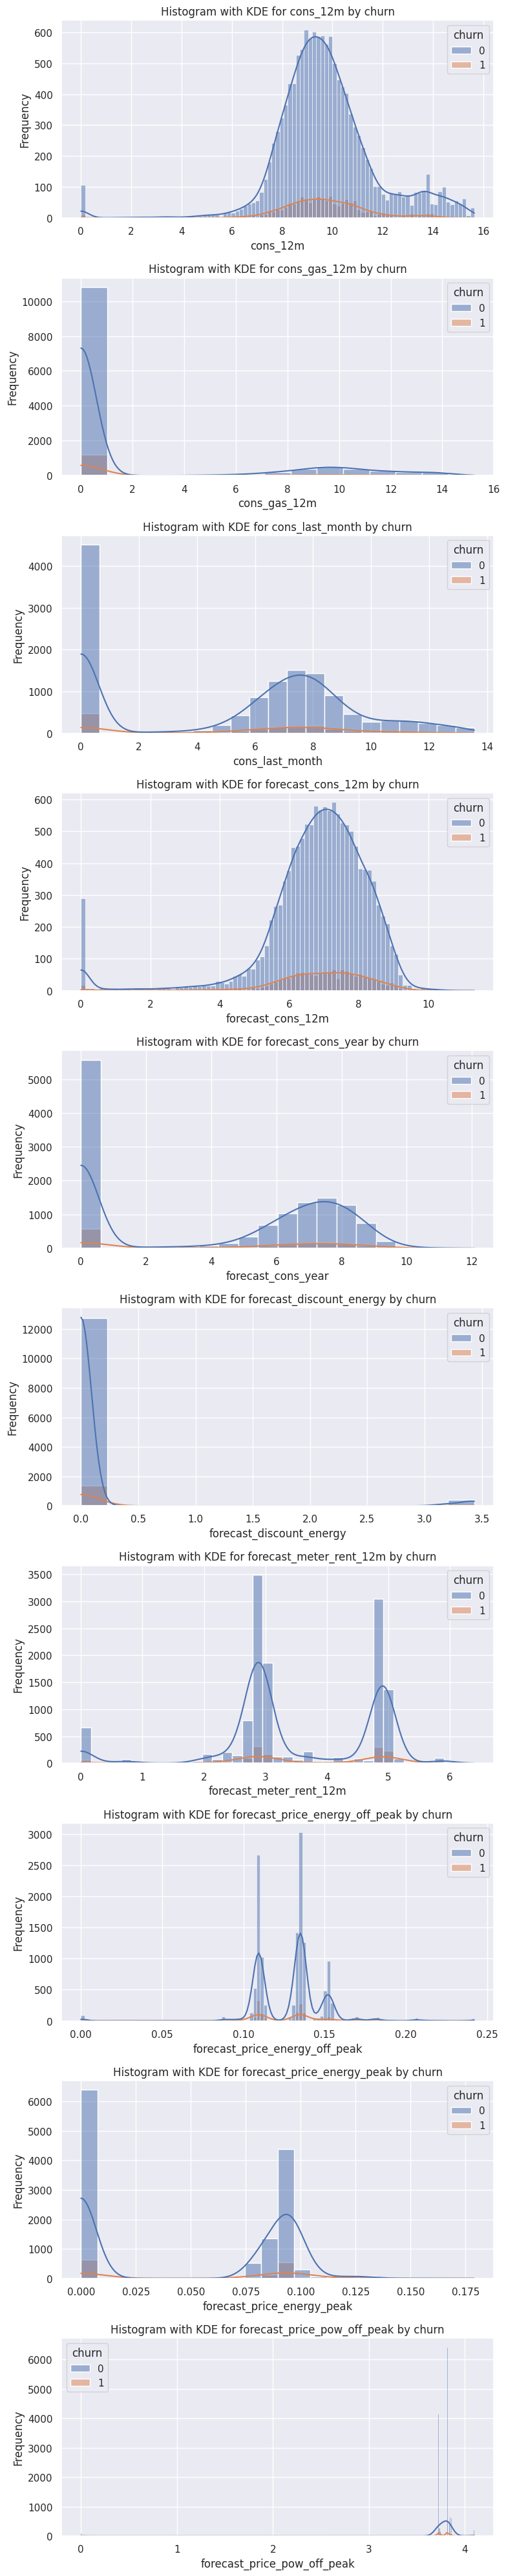

In [ ]:
# create for loop to make histograms for each numeric feature
# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_features.columns), ncols=1, figsize=(8, 4 * len(numeric_features.columns)))

# Loop through numeric columns and create histograms with KDE curves
for i, column in enumerate(numeric_features.columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, hue='churn', kde=True, ax=ax)
    ax.set_title(f'Histogram with KDE for {column} by churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

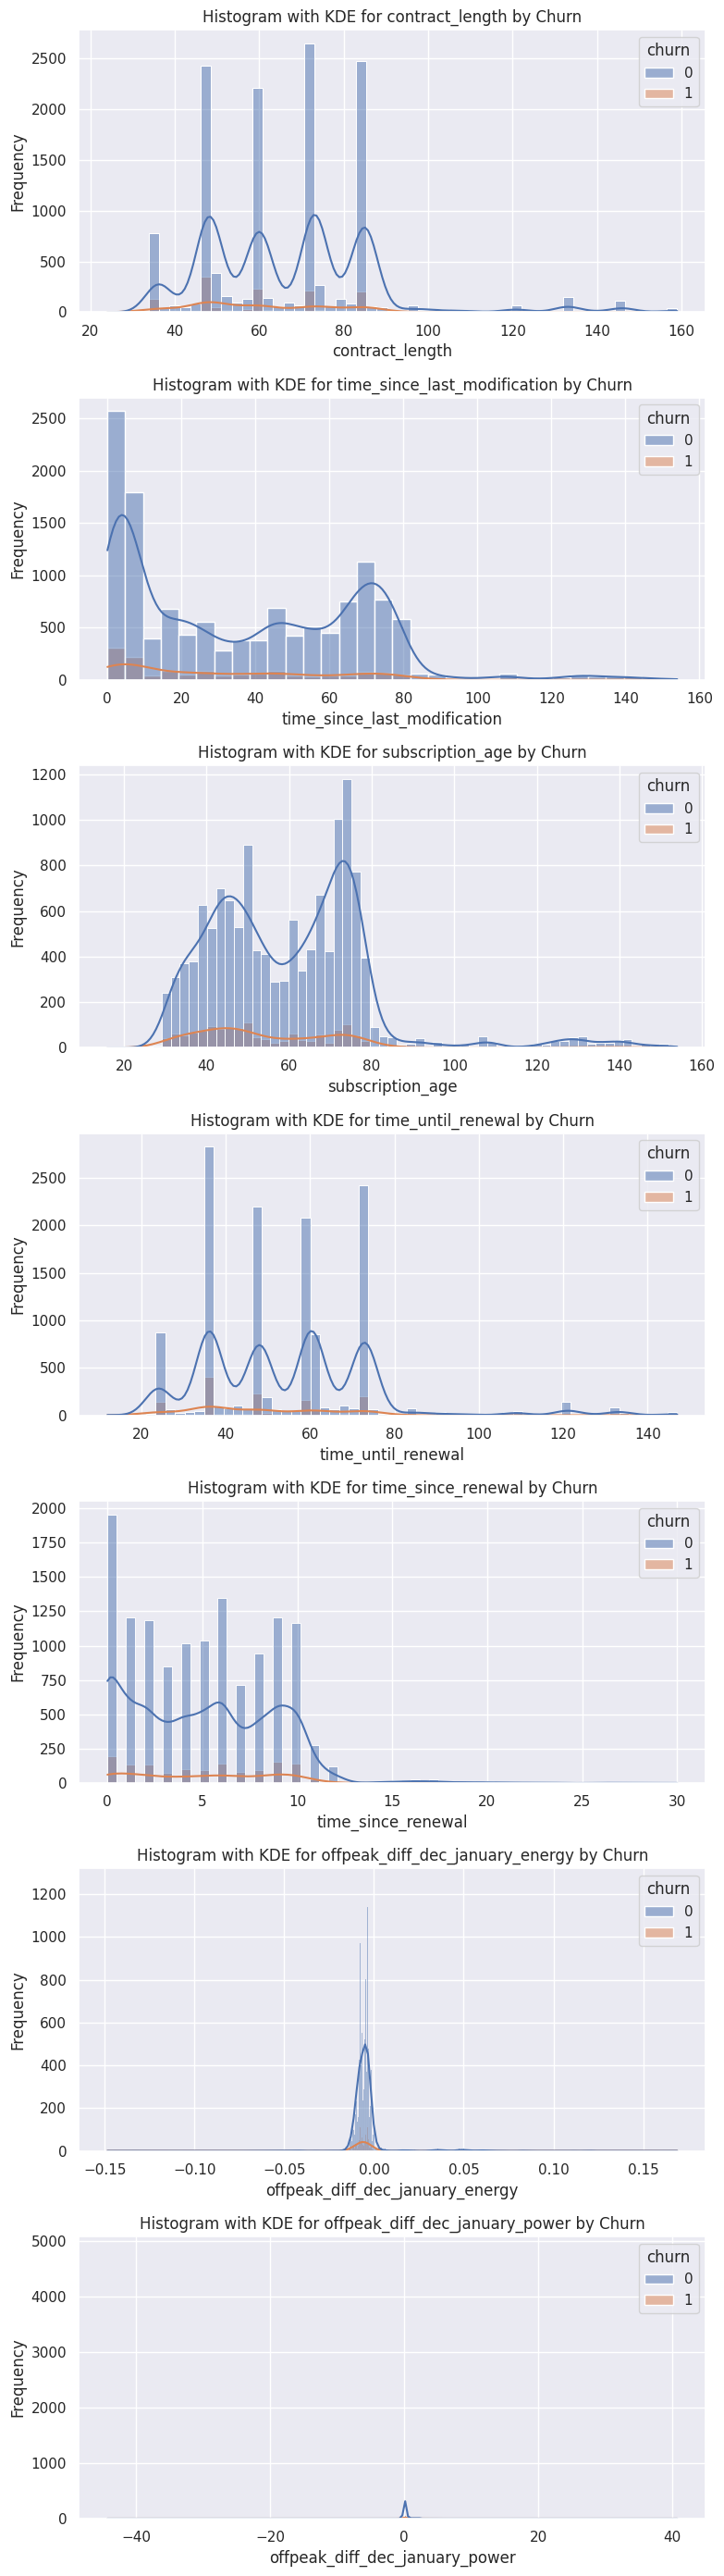

In [ ]:
#create histogram for all new features
# new features list
new_features = [
    'contract_length', 'time_since_last_modification', 'subscription_age',
    'time_until_renewal', 'time_since_renewal', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power'
]

# Set up subplots
fig, axes = plt.subplots(nrows=len(new_features), ncols=1, figsize=(8, 4 * len(new_features)))

# Loop through the new features and create histograms with KDE curves
for i, feature in enumerate(new_features):
    ax = axes[i]
    sns.histplot(data=df, x=feature,hue='churn', kde=True, ax=ax)
    ax.set_title(f'Histogram with KDE for {feature} by Churn')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Feature engineering is a critical step in data preparation. It involves creating, transforming, and selecting features or variables that are most relevant for predictive modeling. The objective is to optimize the model's performance by identifying and shaping the most impactful elements from the data. However, it's important to be cautious of multicollinearity, which occurs when features are highly correlated, potentially leading to unstable or inefficient models. Ideally, we seek features that are independent and exhibit a strong relationship with the target variable, customer churn, while minimizing excessive correlations between the features themselves. This process aims to enhance the accuracy and interpretability of our predictive models.

##Check correlations

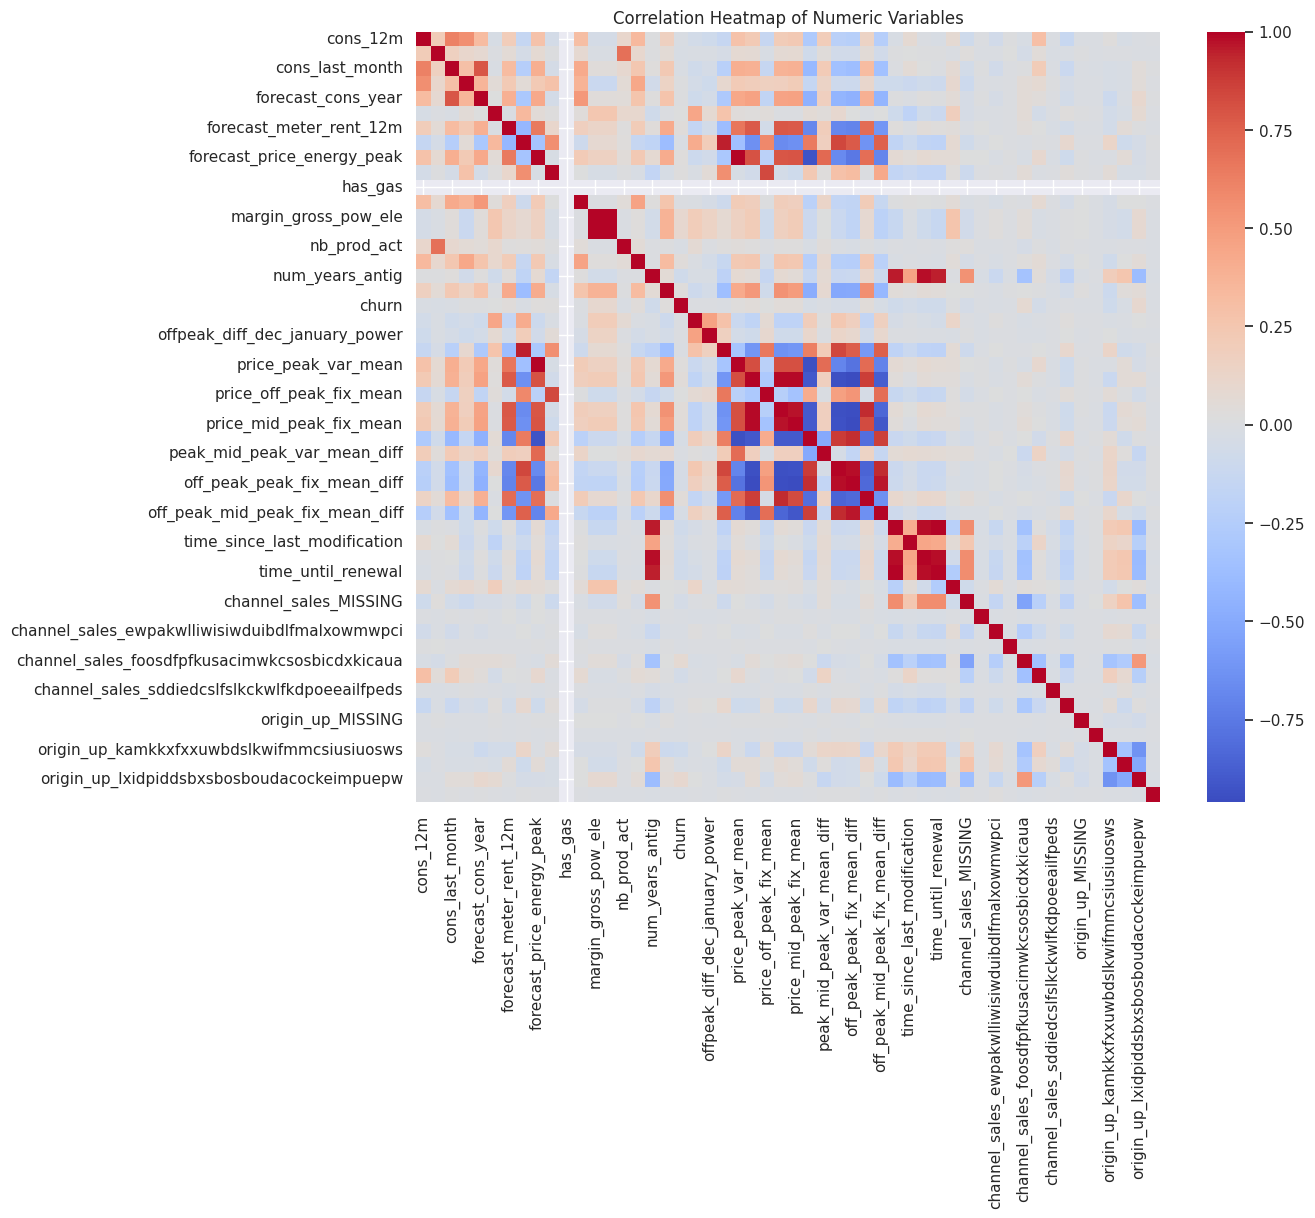

In [ ]:
# Calculate the correlation matrix for all numeric variables
correlation_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [ ]:
# Checking correlations between features
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.9].stack().reset_index()
high_correlation = high_correlation[high_correlation['level_0'] != high_correlation['level_1']]
high_correlation = high_correlation.sort_values(by=0, ascending=False)
print(high_correlation)

                            level_0                          level_1         0
15             margin_gross_pow_ele               margin_net_pow_ele  0.999914
16               margin_net_pow_ele             margin_gross_pow_ele  0.999914
85               time_until_renewal                  contract_length  0.995944
78                  contract_length               time_until_renewal  0.995944
30              price_peak_var_mean       forecast_price_energy_peak  0.994165
10       forecast_price_energy_peak              price_peak_var_mean  0.994165
45          price_mid_peak_fix_mean          price_mid_peak_var_mean  0.991544
35          price_mid_peak_var_mean          price_mid_peak_fix_mean  0.991544
39              price_peak_fix_mean          price_mid_peak_var_mean  0.987691
34          price_mid_peak_var_mean              price_peak_fix_mean  0.987691
81                 subscription_age                  contract_length  0.984456
77                  contract_length                 

In [ ]:
#drop columns with high correlations
# List of columns to drop; all have correlations > .95
columns_to_drop = [
    'margin_gross_pow_ele',
    'time_until_renewal', #dropped instead of contract_length
    'price_peak_var_mean',
    'price_mid_peak_fix_mean',
    'subscription_age',
    'off_peak_mid_peak_var_mean_diff',
    'price_mid_peak_fix_mean',
    'num_years_antig',
    'price_off_peak_var_mean',
]

# Drop the selected columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(df.columns)


Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
       'pow_max', 'churn', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'price_mid_peak_var_mean',
       'price_off_peak_fix_mean', 'price_peak_fix_mean',
       'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff',
       'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff',
       'off_peak_mid_peak_fix_mean_diff', 'contract_length',
       'time_since_last_modification', 'time_since_renewal',
       'channel_sales_MISSING',
       'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_fixdbufsefwooaasfcxdxadsiekoce

I dropped the columns listed above because they exhibited high correlations with other columns in the dataset, which can lead to multicollinearity issues and affect the interpretability of the model. High correlations suggest that these columns may contain similar information, and retaining all of them could result in redundant features, potentially overfitting the model. Moreover, by removing these columns, we aim to reduce model complexity and maintain a more interpretable and robust predictive model. These decisions were made to enhance the model's performance and make it more suitable for addressing the business question related to customer churn prediction.

#Part 2: Model Creation


##Reduced Fit and Regularized Regression Models

We will be fitting our data to multiple regression models, using L1, L2, and Elastic Net methods for regularization. These models will reduce variable importance or eliminate variables based on importance to churn.

In [ ]:
#split df into testing and training
X = df.drop(columns=['churn','id'])
y = df['churn']

# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10224 entries, 10600 to 2667
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        10224 non-null  float64
 1   cons_gas_12m                                    10224 non-null  float64
 2   cons_last_month                                 10224 non-null  float64
 3   forecast_cons_12m                               10224 non-null  float64
 4   forecast_cons_year                              10224 non-null  float64
 5   forecast_discount_energy                        10224 non-null  float64
 6   forecast_meter_rent_12m                         10224 non-null  float64
 7   forecast_price_energy_off_peak                  10224 non-null  float64
 8   forecast_price_energy_peak                      10224 non-null  float64
 9   forecast_price_pow_off_peak         

In [ ]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X_train, y_train)
lr_l1_01.fit(X_train, y_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X_train, y_train)
lr_l12.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                                           feature  coefficient  \
39      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      -0.3049   
34  channel_sales_lmkebamcaaclubfxadlmueccxoimlema      -0.2382   
41      origin_up_lxidpiddsbxsbosboudacockeimpuepw       0.1331   
24                     peak_mid_peak_fix_mean_diff       0.0869   
3                                forecast_cons_12m       0.0808   
0                                         cons_12m      -0.0790   
5                         forecast_discount_energy      -0.0615   
13                                     nb_prod_act      -0.0485   
17                  offpeak_diff_dec_january_power      -0.0436   
33  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua       0.0344   
20                             price_peak_fix_mean      -0.0328   
28                              time_since_renewal      -0.0259   
19                         price_off_peak_fix_mean      -0.0182   
2                                  cons_last_month       0.017

In [ ]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X_train)
y_pred_test = lr_l1_1.predict(X_test)
y_proba_train = lr_l1_1.predict_proba(X_train)
y_proba_test = lr_l1_1.predict_proba(X_test)

y_pred_train1 = lr_l1_01.predict(X_train)
y_pred_test1 = lr_l1_01.predict(X_test)
y_proba_train1 = lr_l1_01.predict_proba(X_train)
y_proba_test1 = lr_l1_01.predict_proba(X_test)

y_pred_train2 = lr_l2.predict(X_train)
y_pred_test2 = lr_l2.predict(X_test)
y_proba_train2 = lr_l2.predict_proba(X_train)
y_proba_test2 = lr_l2.predict_proba(X_test)

y_pred_train12 = lr_l12.predict(X_train)
y_pred_test12 = lr_l12.predict(X_test)
y_proba_train12 = lr_l12.predict_proba(X_train)
y_proba_test12 = lr_l12.predict_proba(X_test)

###Calculating Accuracy, Precision, and Recall for each model:


L1 with c=.1

In [ ]:
# calculate the accuracy, precision, and recall scores
acc2_train = accuracy_score(y_train, y_pred_train)
prec2_train = precision_score(y_train, y_pred_train)
rec2_train = recall_score(y_train, y_pred_train)
auc2_train = roc_auc_score(y_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc2_train))
print("Precision: {:.4f}".format(prec2_train))
print("Recall.  : {:.4f}".format(rec2_train))
print("AUC      : {:.4f}".format(auc2_train))
print("")

# calculate the accuracy, precision, and recall scores
acc2_test = accuracy_score(y_test, y_pred_test)
prec2_test = precision_score(y_test, y_pred_test)
rec2_test = recall_score(y_test, y_pred_test)
auc2_test = roc_auc_score(y_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc2_test))
print("Precision: {:.4f}".format(prec2_test))
print("Recall.  : {:.4f}".format(rec2_test))
print("AUC      : {:.4f}".format(auc2_test))

 -- train set -- 
Accuracy : 0.9011
Precision: 0.3478
Recall.  : 0.0080
AUC      : 0.6483

 -- test set -- 
Accuracy : 0.9037
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6400


L1 with c = .01

In [ ]:
# calculate the accuracy, precision, and recall scores
acc2_train1 = accuracy_score(y_train, y_pred_train1)
prec2_train1 = precision_score(y_train, y_pred_train1)
rec2_train1 = recall_score(y_train, y_pred_train1)
auc2_train1 = roc_auc_score(y_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc2_train1))
print("Precision: {:.4f}".format(prec2_train1))
print("Recall.  : {:.4f}".format(rec2_train1))
print("AUC      : {:.4f}".format(auc2_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc2_test1 = accuracy_score(y_test, y_pred_test1)
prec2_test1 = precision_score(y_test, y_pred_test1)
rec2_test1 = recall_score(y_test, y_pred_test1)
auc2_test1 = roc_auc_score(y_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc2_test1))
print("Precision: {:.4f}".format(prec2_test1))
print("Recall.  : {:.4f}".format(rec2_test1))
print("AUC      : {:.4f}".format(auc2_test1))

 -- train set -- 
Accuracy : 0.9014
Precision: 0.3571
Recall.  : 0.0050
AUC      : 0.6254

 -- test set -- 
Accuracy : 0.9042
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6213


L2

In [ ]:
# calculate the accuracy, precision, and recall scores
acc2_train2 = accuracy_score(y_train, y_pred_train2)
prec2_train2 = precision_score(y_train, y_pred_train2)
rec2_train2 = recall_score(y_train, y_pred_train2)
auc2_train2 = roc_auc_score(y_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc2_train2))
print("Precision: {:.4f}".format(prec2_train2))
print("Recall.  : {:.4f}".format(rec2_train2))
print("AUC      : {:.4f}".format(auc2_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc2_test2 = accuracy_score(y_test, y_pred_test2)
prec2_test2 = precision_score(y_test, y_pred_test2)
rec2_test2 = recall_score(y_test, y_pred_test2)
auc2_test2 = roc_auc_score(y_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc2_test2))
print("Precision: {:.4f}".format(prec2_test2))
print("Recall.  : {:.4f}".format(rec2_test2))
print("AUC      : {:.4f}".format(auc2_test2))

 -- train set -- 
Accuracy : 0.9010
Precision: 0.3333
Recall.  : 0.0080
AUC      : 0.6578

 -- test set -- 
Accuracy : 0.9032
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6490


Elastic Net

In [ ]:
# calculate the accuracy, precision, and recall scores
acc2_train12 = accuracy_score(y_train, y_pred_train12)
prec2_train12 = precision_score(y_train, y_pred_train12)
rec2_train12 = recall_score(y_train, y_pred_train12)
auc2_train12 = roc_auc_score(y_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc2_train12))
print("Precision: {:.4f}".format(prec2_train12))
print("Recall.  : {:.4f}".format(rec2_train12))
print("AUC      : {:.4f}".format(auc2_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc2_test12 = accuracy_score(y_test, y_pred_test12)
prec2_test12 = precision_score(y_test, y_pred_test12)
rec2_test12 = recall_score(y_test, y_pred_test12)
auc2_test12 = roc_auc_score(y_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc2_test12))
print("Precision: {:.4f}".format(prec2_test12))
print("Recall.  : {:.4f}".format(rec2_test12))
print("AUC      : {:.4f}".format(auc2_test12))

 -- train set -- 
Accuracy : 0.9019
Precision: 1.0000
Recall.  : 0.0010
AUC      : 0.5737

 -- test set -- 
Accuracy : 0.9053
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.5798


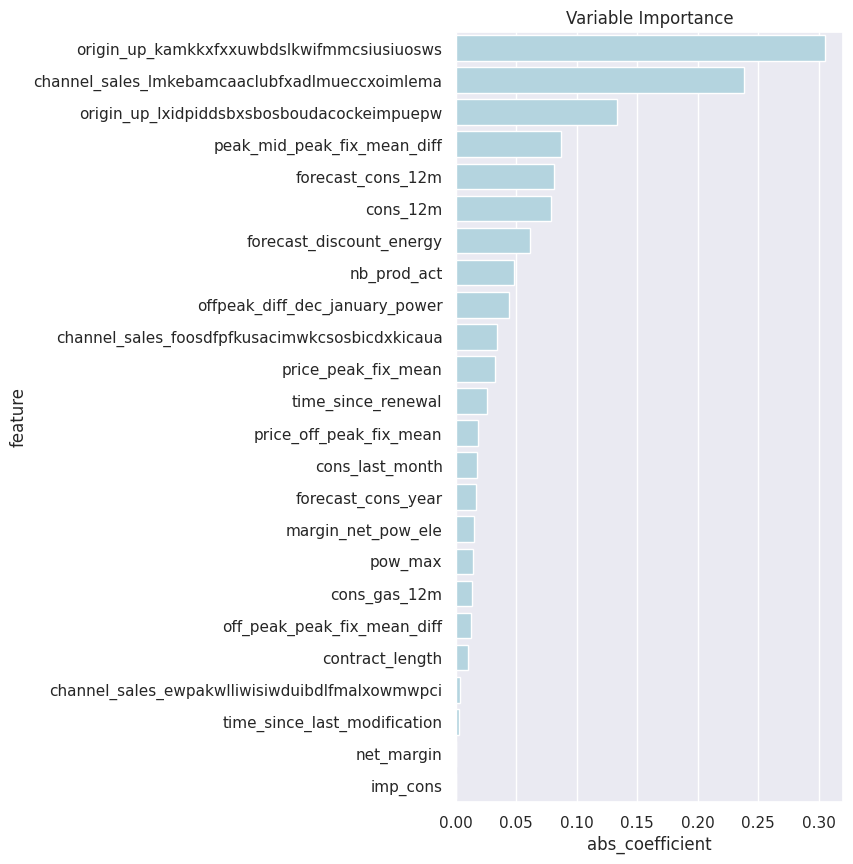

-- rejected --
 channel_sales_usilxuppasemubllopkaafesmlibmsdf
 channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
 origin_up_MISSING
 origin_up_ewxeelcelemmiwuafmddpobolfuxioce
 origin_up_ldkssxwpmemidmecebumciepifcamkci
 channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
 off_peak_peak_var_mean_diff
 channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
 channel_sales_MISSING
 off_peak_mid_peak_fix_mean_diff
 peak_mid_peak_var_mean_diff
 price_mid_peak_var_mean
 offpeak_diff_dec_january_energy
 has_gas
 forecast_price_pow_off_peak
 forecast_price_energy_peak
 forecast_price_energy_off_peak
 forecast_meter_rent_12m
 origin_up_usapbepcfoloekilkwsdiboslwaxobdp


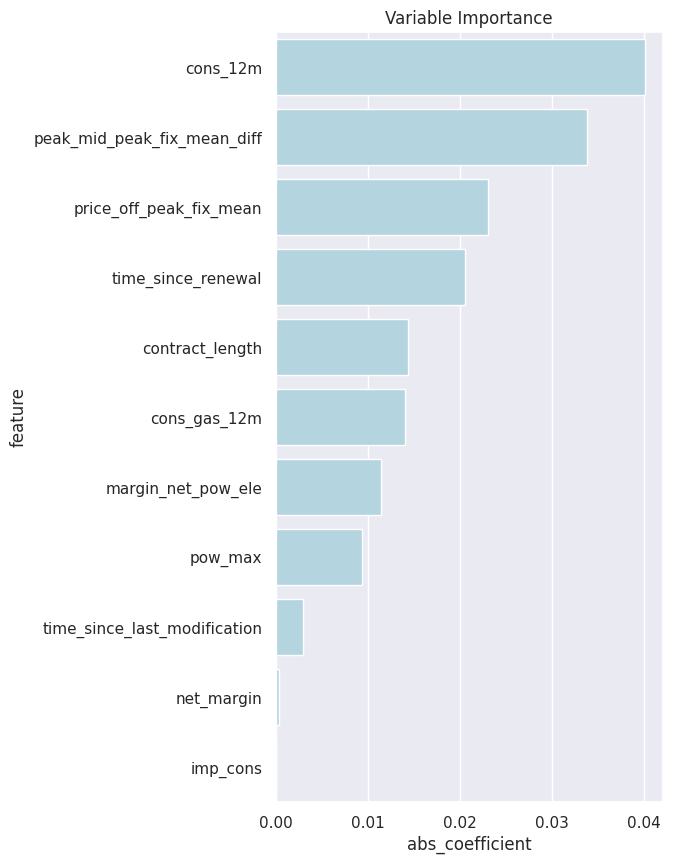

-- rejected --
 channel_sales_MISSING
 channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
 channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci
 origin_up_lxidpiddsbxsbosboudacockeimpuepw
 origin_up_ldkssxwpmemidmecebumciepifcamkci
 off_peak_mid_peak_fix_mean_diff
 channel_sales_foosdfpfkusacimwkcsosbicdxkicaua
 channel_sales_lmkebamcaaclubfxadlmueccxoimlema
 channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
 channel_sales_usilxuppasemubllopkaafesmlibmsdf
 origin_up_MISSING
 origin_up_ewxeelcelemmiwuafmddpobolfuxioce
 origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws
 channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
 off_peak_peak_var_mean_diff
 off_peak_peak_fix_mean_diff
 forecast_price_energy_peak
 cons_last_month
 forecast_cons_12m
 forecast_cons_year
 forecast_discount_energy
 forecast_meter_rent_12m
 forecast_price_energy_off_peak
 forecast_price_pow_off_peak
 peak_mid_peak_var_mean_diff
 has_gas
 nb_prod_act
 offpeak_diff_dec_january_energy
 offpeak_diff_dec_january_power
 price_mid_peak_var_mean
 pr

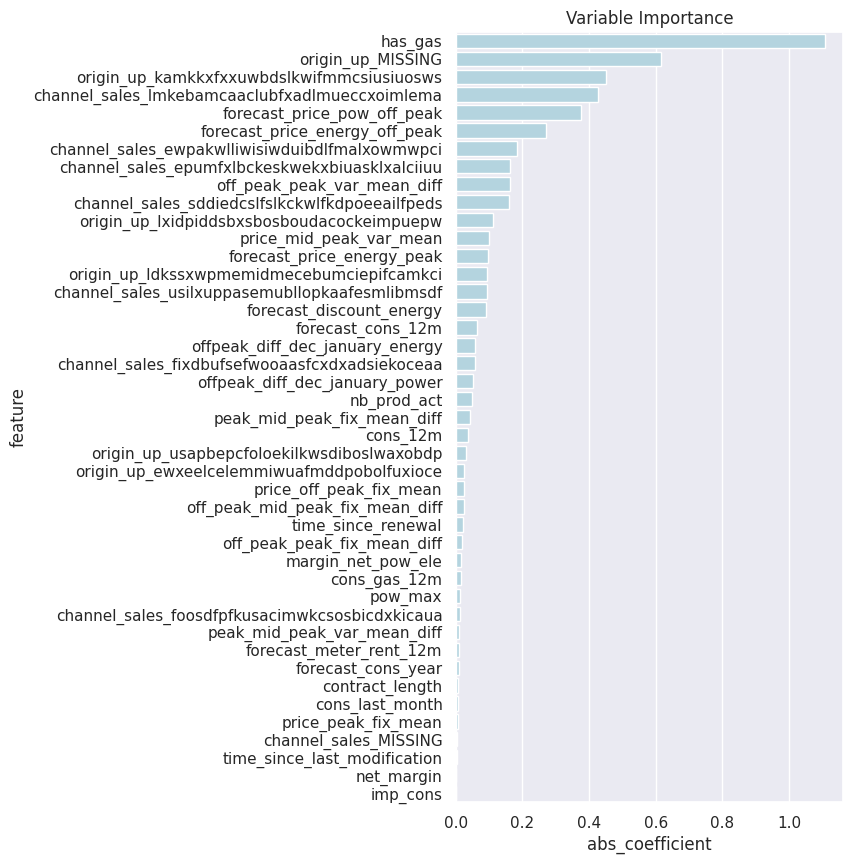

-- rejected --


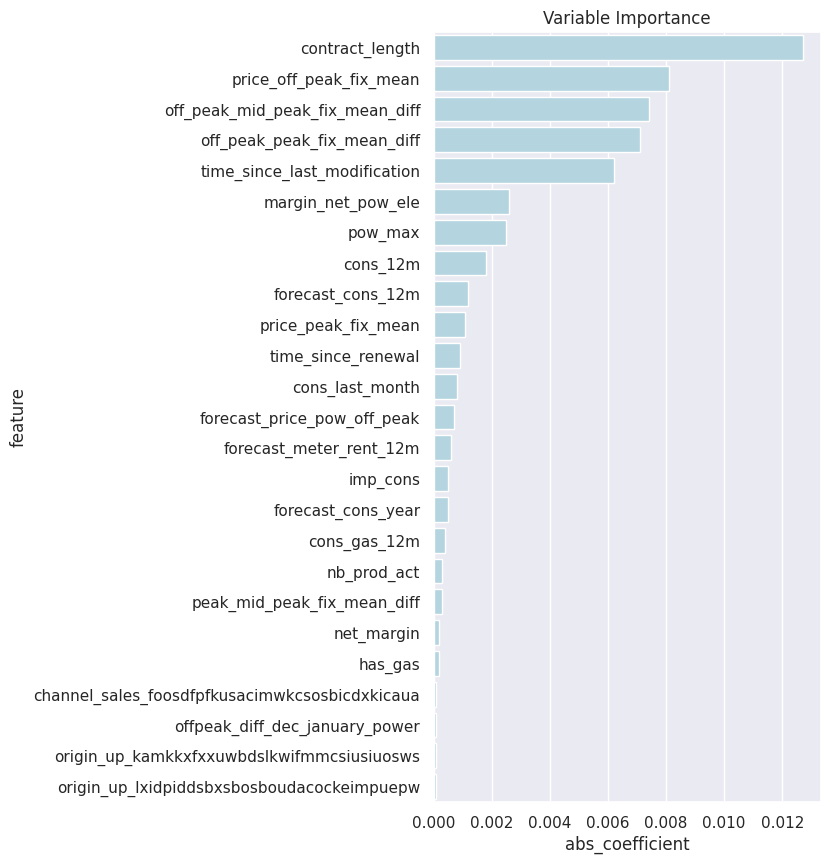

-- rejected --
 channel_sales_usilxuppasemubllopkaafesmlibmsdf
 origin_up_MISSING
 channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
 origin_up_ldkssxwpmemidmecebumciepifcamkci
 channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
 channel_sales_lmkebamcaaclubfxadlmueccxoimlema
 origin_up_ewxeelcelemmiwuafmddpobolfuxioce
 off_peak_peak_var_mean_diff
 channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci
 channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
 channel_sales_MISSING
 peak_mid_peak_var_mean_diff
 price_mid_peak_var_mean
 offpeak_diff_dec_january_energy
 forecast_price_energy_peak
 forecast_price_energy_off_peak
 forecast_discount_energy
 origin_up_usapbepcfoloekilkwsdiboslwaxobdp


In [ ]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

None of these models perform well, particularly given the recall and precision; On the testing sets, none of the models are identifying any positive churn cases, resulting in a precision and recall of 0

##Random Forest Model

In [ ]:
# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['churn','id'])
y = df['churn']

# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10224, 43)
(10224,)
(4382, 43)
(4382,)


In [ ]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf = rf_classifier.fit(X_train, y_train)
rf

RandomForestClassifier(random_state=42)

###Calculating Accuracy, Precision, and Recall

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3967
           1       0.75      0.04      0.07       415

    accuracy                           0.91      4382
   macro avg       0.83      0.52      0.51      4382
weighted avg       0.89      0.91      0.87      4382

Confusion Matrix:
 [[3962    5]
 [ 400   15]]


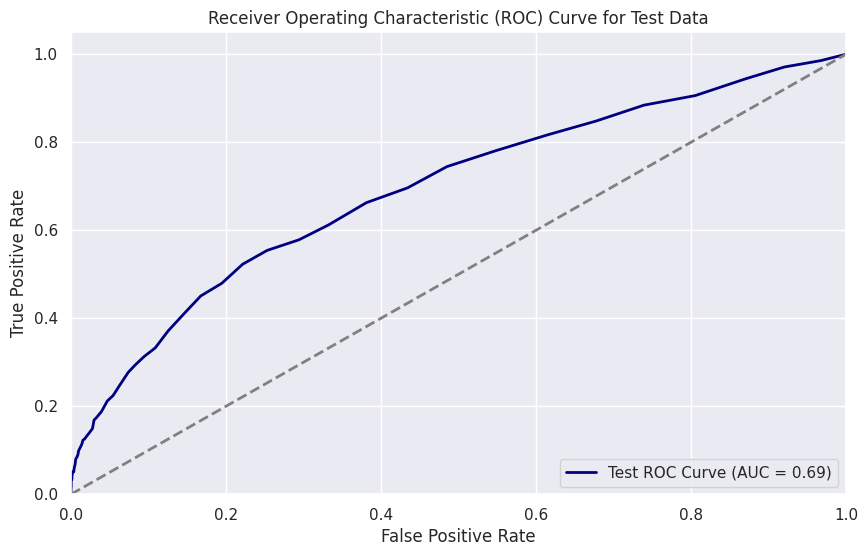

In [ ]:
# Create ROC curve for test data
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve for test data
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Data')
plt.legend(loc='lower right')
plt.show()


==============================================================================
                        Model Performance Evaluation

**Accuracy Overview**
- The random forest model demonstrated an accuracy of 91%, which initially appears promising.

**Challenging Minority Class Prediction**
- A deeper analysis reveals that the model encounters challenges when predicting the minority class, i.e., churned customers.
- The precision for the churn class is only 0.82, indicating that when the model predicts a customer will churn, it's correct about 82% of the time.
- The recall (sensitivity) for the churn class is quite low at 0.04, implying the model captures only 4% of the actual churn cases.
- Consequently, the churn class has a low F1-score of 0.08, signifying that the model struggles to identify customers at risk of churning.

==============================================================================
                    Metric Selection Rationale

- I opted for a set of evaluation metrics including accuracy, precision, recall, and F1-score. These metrics together provide a thorough understanding of the model's performance, particularly in datasets with imbalanced classes.
- I calculated the ROC AUC to gauge the model's capacity to distinguish between classes, which is particularly relevant when dealing with imbalanced datasets.

==============================================================================
                  Random Forest Advantages

- Random Forest excels in handling high-dimensional data effectively.
- The model showcases resistance to overfitting, ensuring stable performance.
- It has the potential to capture intricate relationships in the data, contributing to robust predictions.
- Random Forest is resilient to outliers, which is crucial when working with real-world data.
- It requires minimal data preprocessing compared to some other machine learning algorithms.

==============================================================================
                  Random Forest Disadvantages

- The model's ensemble nature can make it challenging to interpret, and predictions may be difficult to explain.
- In scenarios with severely imbalanced datasets, such as this one, Random Forest might not deliver optimal results.

==============================================================================
                Model Performance Assessment

**Unsatisfactory Performance**
- In conclusion, the model's performance is unsatisfactory in predicting customer churn.
- Its ability to identify potential churners is notably weak, which is a critical business objective.
- Enhancements are required to improve the model's recall and overall performance for customer churn prediction.
- Further refinement through model tuning, advanced feature engineering, or exploration of alternative algorithms may be necessary to address the business goal of reducing customer churn effectively.


==============================================================================


##Optimized Random Forest Model

We will now use gridsearch to find the best parameters to use

In [ ]:
# Create a Random Forest classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

In [ ]:
# Prepare the dataset
X = df.drop(columns=['churn', 'id'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}


#use gridsearch to find optimal metrics
grid_search = GridSearchCV(estimator=rf_classifier2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

###Calculating Accuracy, Precision, and Recall

In [ ]:
# Create the Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions (probabilities)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Define a custom threshold
threshold = 0.3

# Apply the threshold to convert probabilities to binary predictions
y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_custom_threshold)
recall = recall_score(y_test, y_pred_custom_threshold)
precision = precision_score(y_test, y_pred_custom_threshold)
report = classification_report(y_test, y_pred_custom_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.90
Recall: 0.14
Precision: 0.39
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      3967
           1       0.39      0.14      0.20       415

    accuracy                           0.90      4382
   macro avg       0.65      0.56      0.57      4382
weighted avg       0.87      0.90      0.88      4382

Confusion Matrix:
 [[3877   90]
 [ 358   57]]


                                           Feature  Importance
12                              margin_net_pow_ele    0.071815
0                                         cons_12m    0.068507
6                          forecast_meter_rent_12m    0.064854
14                                      net_margin    0.064152
3                                forecast_cons_12m    0.061288
21                     off_peak_peak_var_mean_diff    0.050424
2                                  cons_last_month    0.046877
15                                         pow_max    0.046059
16                 offpeak_diff_dec_january_energy    0.045516
27                    time_since_last_modification    0.043555
4                               forecast_cons_year    0.038302
11                                        imp_cons    0.037708
7                   forecast_price_energy_off_peak    0.037085
26                                 contract_length    0.033950
28                              time_since_renewal    0

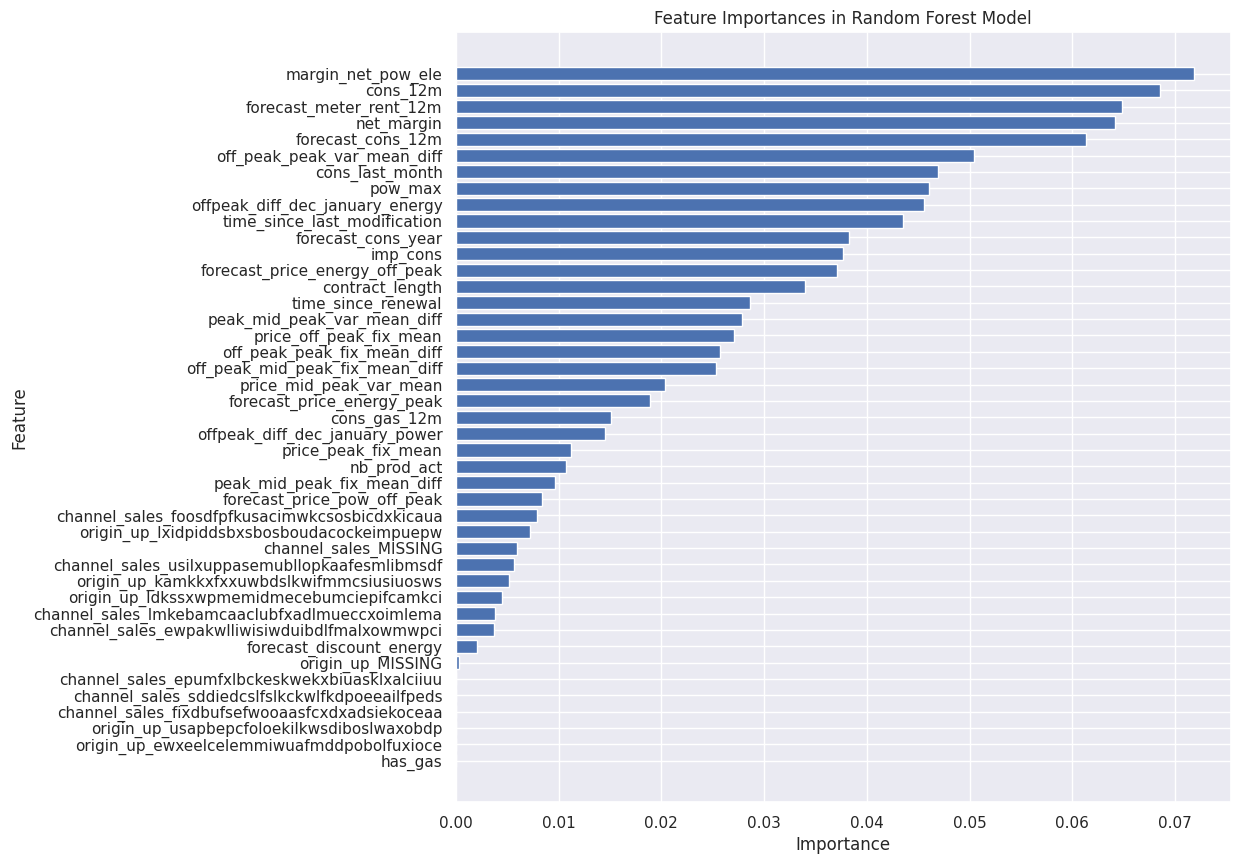

In [ ]:
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(features)

# Plotting feature importances
plt.figure(figsize=(10, 10))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


##Random Forest Model using SMOTE

SMOTE is used when our historical data is imbalanced. Only a small number of customers have churned and this imbalance can make it hard for our model to learn about the churning customers. SMOTE helps by creating synthetic (or artificial) data points that resemble the less frequent cases (in this case, the customers who churned). This way, the model gets a more balanced view and can learn better.

In [ ]:
# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['churn', 'id'])
y = df['churn']

# Handling class imbalance with SMOTE
smote = SMOTE()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline([('smote', smote), ('rf', rf_classifier)])

# Define hyperparameters for GridSearch
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best model after grid search
best_rf = grid_search.best_estimator_

###Calculating Accuracy, Precision, and Recall

In [ ]:
# Make predictions with the best model
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold
threshold = 0.5  # Adjust this based on your requirement
y_pred_adjusted = np.where(y_pred_proba > threshold, 1, 0)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.76
Recall: 0.33
Precision: 0.15
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      3967
           1       0.15      0.33      0.20       415

    accuracy                           0.76      4382
   macro avg       0.53      0.57      0.53      4382
weighted avg       0.85      0.76      0.79      4382

Confusion Matrix:
 [[3175  792]
 [ 278  137]]


This method definitely increased the recall, making it nearly 1/3 of actual churn cases were correctly identified, however the accuracy is fairly low at 76%

#Findings

Considering each model's performance, I believe the Optimized Random Forest Model is the best model to use out of the ones I have created. This model maintains a high accuracy (.90), has a significantly higher recall than the previous models (.14), and does not have too low of a precision score (.39), unlike the SMOTE method Random Forest Model. Maintaining a higher precision score ensures the customers it identifies as likely to churn are highly likely to do so, making it efficient to offer them targeted plans or discounts.


#Financial implications

Implications:

The optimized random forest model may reduce costs by correctly identifying some potential churners (true positives) and allowing the business to implement targeted retention strategies for these customers.
However, the model's recall for churners is low (only 14% of actual churners are correctly identified). This implies that there's a risk of missing many customers who might churn, potentially resulting in revenue loss.
The high number of false positives (90) implies that the cost of implementing retention strategies for non-churning customers may offset the potential savings from preventing churn.


To improve profit and cost reduction, the model might require further optimization to balance precision and recall, reducing false positives and increasing true positives. The most likely scenario using this model is that we would need to offer more discounts than the number of customers who would have actually left PowerCo.
In summary, while the model shows promise in reducing costs by identifying some potential churners, it may need refinement to capture more actual churners, and careful consideration of the cost-benefit trade-offs of retention strategies is essential.





